<a href="https://colab.research.google.com/github/supriya-somishetty/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#load the dataset
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#check for null values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
#Converting the categorical data into numeric data
df_encoded = pd.get_dummies(df, drop_first=True)
# Convert any boolean columns to integers (0 and 1)
df_encoded = df_encoded.astype(int)
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


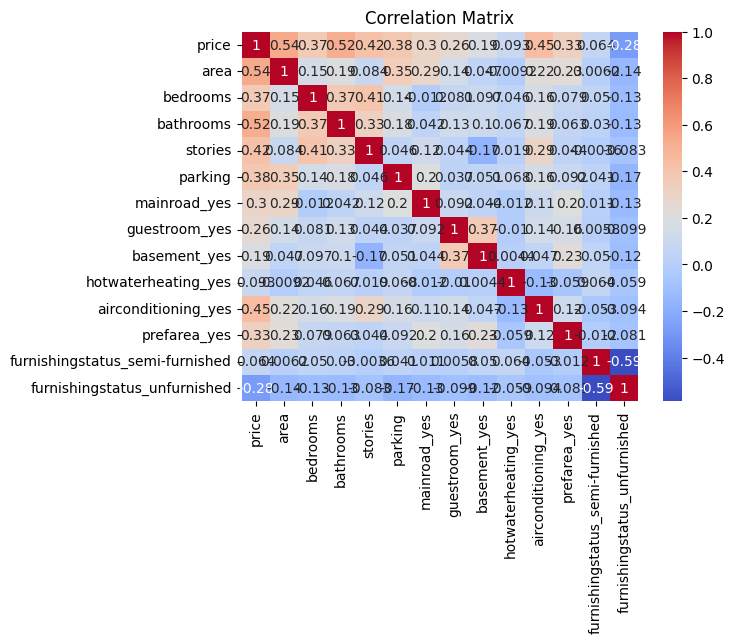

In [6]:
#plot the correlation matrix to know the relationship among the features
corr_matrix=df_encoded.corr()
sn.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [7]:
#selecting the independent variable based on the above correlation matrix
x=df_encoded[['area', 'bathrooms', 'stories', 'airconditioning_yes', 'bedrooms', 'parking']]
y=df_encoded["price"]

In [8]:
#splitting the data in training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
#Building the linear regression model
model=LinearRegression()

#fitting the model to the training data
model.fit(x_train,y_train)
print("Model is trained")

Model is trained


In [10]:
#model evaluation
y_pred=model.predict(x_test)

#Finding Mean Square Error and R-Squares
mse=mean_squared_error(y_test,y_pred)
r2=model.score(x_test,y_test)
print("Mean Square Error:",mse)
print("R-Squared:",r2)

Mean Square Error: 991340963294.0732
R-Squared: 0.6559657427831056


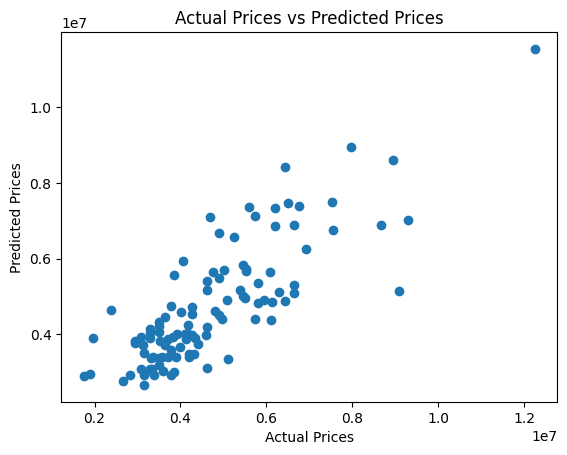

In [11]:
# To visualize the predictions against actual prices, we'll use a scatter plot (testing set)
y_pred=model.predict(x_test)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

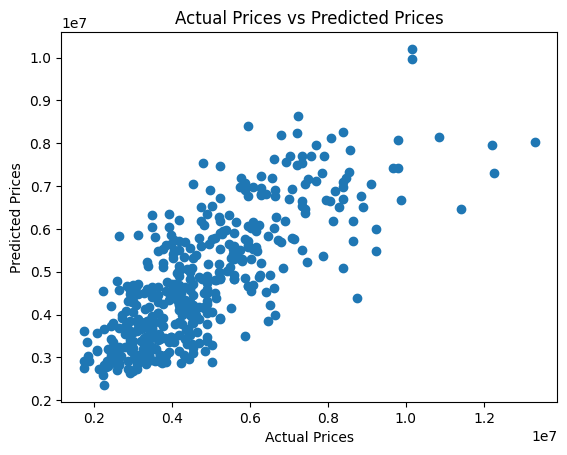

In [12]:
# To visualize the predictions against actual prices, we'll use a scatter plot (training set)
y_pred=model.predict(x_train)
plt.scatter(y_train,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()